# Lab 1: Categorical Data
[![https://imgs.xkcd.com/comics/salvage.png](https://imgs.xkcd.com/comics/salvage.png)](https://imgs.xkcd.com/comics/salvage.png)

We know who was on the titanic the day it sank and we know who survived. Your taks today is to analyze the public available data to find more about the people.

In [2]:
import pip
!pip install numpy matplotlib pandas 
!pip install plotly==4.12.0

## TASK 1

Use Python to answer the following questions. Use the print command to present your answer in a full sentence.

### 1. First, load the data set
The data set is named `titanic.csv`. Print the head of the data set.

In [3]:
import pandas as pd
# YOUR CODE HERE
#raise NotImplementedError()
df = pd.read_csv("data/titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 2. How many passengers have embarked in Southampton?

In [4]:
# YOUR CODE HERE
#raise NotImplementedError()
df[df['Embarked'] == 'S'].shape
#df.loc[:,'Embarked'].value_counts()

(644, 12)

### 3. Who has paid most for his/her ticket? Find out the name of this passenger.

In [5]:
# YOUR CODE HERE
#raise NotImplementedError()
df.loc[df.Fare == df.Fare.max(),['Name']].head()

,Name
258,"Ward, Miss. Anna"
679,"Cardeza, Mr. Thomas Drake Martinez"
737,"Lesurer, Mr. Gustave J"


### 4. Who was the youngest passenger? Find out his/her name and age.

In [6]:
# YOUR CODE HERE
#raise NotImplementedError()
youngest = df.loc[df.Age == df.Age.min(),['Name','Age']]
youngest.head()

,Name,Age
803,"Thomas, Master. Assad Alexander",0.42


### 5. Who was the oldest passenger who did not survive? Find out his/her name and age.

In [7]:
# YOUR CODE HERE
#raise NotImplementedError()
df.loc[df.Survived == 0].loc[df.Age.max()].head()

PassengerId                      81
Survived                          0
Pclass                            3
Name           Waelens, Mr. Achille
Sex                            male
Name: 80, dtype: object

## TASK 2

Use Python's plotting libraries to visualize the following insights.

Remember that each plot has a **title**, **axis labels** and a **legend**.

### 1. Grouped bar plot showing how many passengers died/survived for each passenger class

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


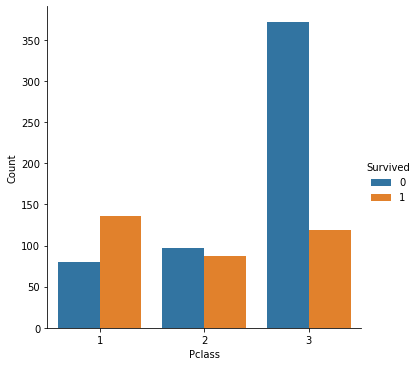

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns
# YOUR CODE HERE
#raise NotImplementedError()
#df_ = pd.DataFrame(df.loc[:,['Pclass','Survived']].value_counts(),columns=['Count']).reset_index()

#df2 = df_.pivot(columns='Pclass',values='Survived')
#df_.plot(kind='bar')
df_plot = df.groupby(['Pclass', 'Survived']).size().reset_index().pivot(columns='Pclass', index='Survived', values=0)
print(df_plot.head())
# sns.catplot(data=df_plot,kind='bar',x='Pclass',y='Count',hue='Survived')
plt.show()
sns.catplot(data=pd.DataFrame(df.loc[:,['Pclass','Survived']].value_counts(),columns=['Count']).reset_index(),kind='bar',x='Pclass',y='Count',hue='Survived',hue_order=[0,1])
plt.show()

### 2. Sankey diagram
[Sankey diagrams](https://plot.ly/python/sankey-diagram/) are flow diagrams that visualize the flow from one category to another. Sankey diagarams are advanced plots that are avaible, for instance, in the [plotly framework](https://plot.ly/python/) that supports interactive graphs. 

Use a Sankey diagram to visualize how many passengers from each embarking location survived/did not survive.

![Example Sankey Diagram](https://plot.ly/~PythonPlotBot/2588/basic-sankey-diagram.png)

First of, prepare the data in such a way, that it can be visualized later on. For help on that, please be refered to the [official docs](https://plotly.com/python/sankey-diagram/#hovertemplate-and-customdata-of-sankey-diagrams). Important to know is, that you need to define for each _stream_ a `source`, `target` and `value`. The `source` is the embarking location, the `target` if survived or not and the `value` the number of people who died or survived.

In [53]:
# YOUR CODE HERE
#raise NotImplementedError()
import numpy as np
import plotly.graph_objects as go

# ss = df.loc[df.Survived == 1].loc[df.Embarked == "S"]["Survived"].count()
ss = len(df.loc[df.Survived == 1].loc[df.Embarked == "S"].index)
sd = len(df.loc[df.Survived == 0].loc[df.Embarked == "S"].index)
cs = len(df.loc[df.Survived == 1].loc[df.Embarked == "C"].index)
cd = len(df.loc[df.Survived == 0].loc[df.Embarked == "C"].index)
qs = len(df.loc[df.Survived == 1].loc[df.Embarked == "Q"].index)
qd = len(df.loc[df.Survived == 0].loc[df.Embarked == "Q"].index)
ns = len(df.loc[df.Survived == 1].loc[df.Embarked.isna()].index)
nd = len(df.loc[df.Survived == 0].loc[df.Embarked.isna()].index)
label=["S","C","Q","NaN","Survived","Died"]
source = [0,0,1,1,2,2,3,3]
target = [4,5,4,5,4,5,4,5]
value = [ss,sd,cs,cd,qs,qd,ns,nd]
print(df.loc[df.Survived.isna()])

Empty DataFrame
Columns: [PassengerId, Survived, Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


After seperating those numbers and preprocessing those, use them to plot the Sanky diagram.

In [54]:
link = dict(source = source, target = target, value = value)
node = dict(label=label,pad=50,thickness=5)
data = go.Sankey(link = link,node=node)
fig = go.Figure(data=data)
fig.show()

Now, you are done. Relax and submitt your solution to the eLearning system. Good work!